In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
df.drop(99832, inplace = True)

In [9]:
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


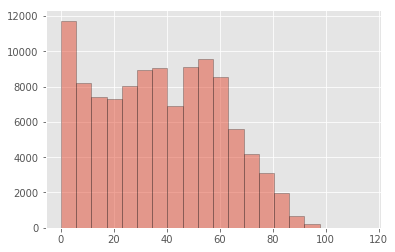

In [12]:
df["Age"].hist(ec = "k", alpha = .5, bins = 20)

In [14]:
df["Diabetes"].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [15]:
df["Hipertension"].value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

In [16]:
df["Alcoholism"].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [17]:
df["Handcap"].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [18]:
df["No-show"].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [19]:
def one_hot(x):
    if x == "No":
        return 0
    elif x == "Yes":
        return 1
    else:
        return "Error"

In [20]:
df["No-show"] = df["No-show"].apply(one_hot)

In [21]:
df["No-show"].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

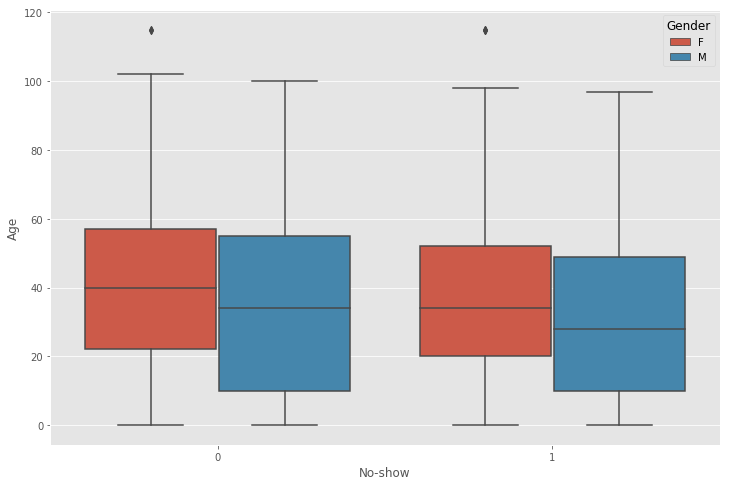

In [23]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "No-show", y = "Age", data = df, hue = "Gender")

In [25]:
outliers_age = list(df[df["Age"] > 110].index)

In [26]:
outliers_age

[63912, 63915, 68127, 76284, 97666]

In [27]:
df.drop(outliers_age, inplace = True)

In [28]:
df[df["Age"] > 110]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [30]:
df[df.isnull() == True].describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [32]:
features = ["Gender", "Age", "Neighbourhood", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]
labels = ["No-show"]

In [33]:
X = df[features]

In [35]:
def one_hot_gender(x):
    if x == "F":
        return 0
    elif x == "M":
        return 1
    else:
        return "Error"

In [36]:
X["Gender"] = X["Gender"].apply(one_hot_gender)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
X["Neighbourhood"].nunique()

81

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
ohe = LabelEncoder()

In [42]:
X_ohe = ohe.fit_transform(X["Neighbourhood"])

In [43]:
X["Neighbourhood"] = X_ohe

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
from sklearn.preprocessing import Normalizer

In [46]:
normalizer = Normalizer()

In [48]:
y = df[labels]

In [50]:
X.shape

(110521, 9)

In [51]:
y.shape

(110521, 1)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [54]:
X_train = normalizer.fit_transform(X_train)

In [55]:
X_test = normalizer.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
preds = model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.79      1.00      0.89     17566
          1       0.50      0.00      0.00      4539

avg / total       0.73      0.79      0.70     22105



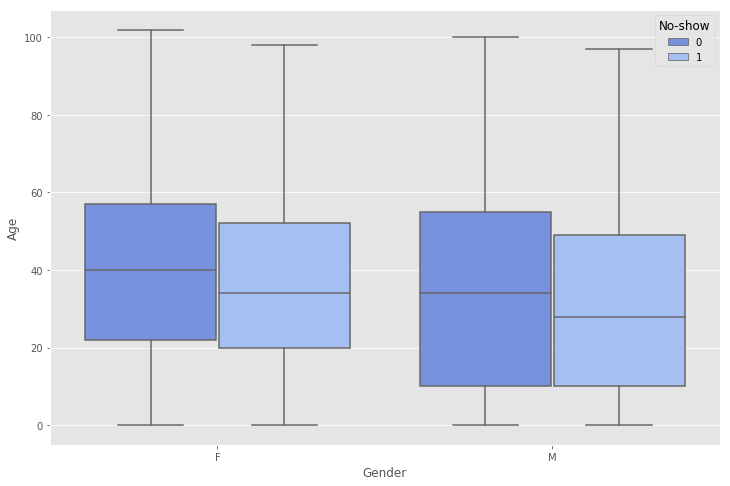

In [64]:
plt.figure(figsize = (12, 8))
sns.set_palette("coolwarm")
sns.boxplot(x = "Gender", y = "Age", data = df, hue = "No-show")

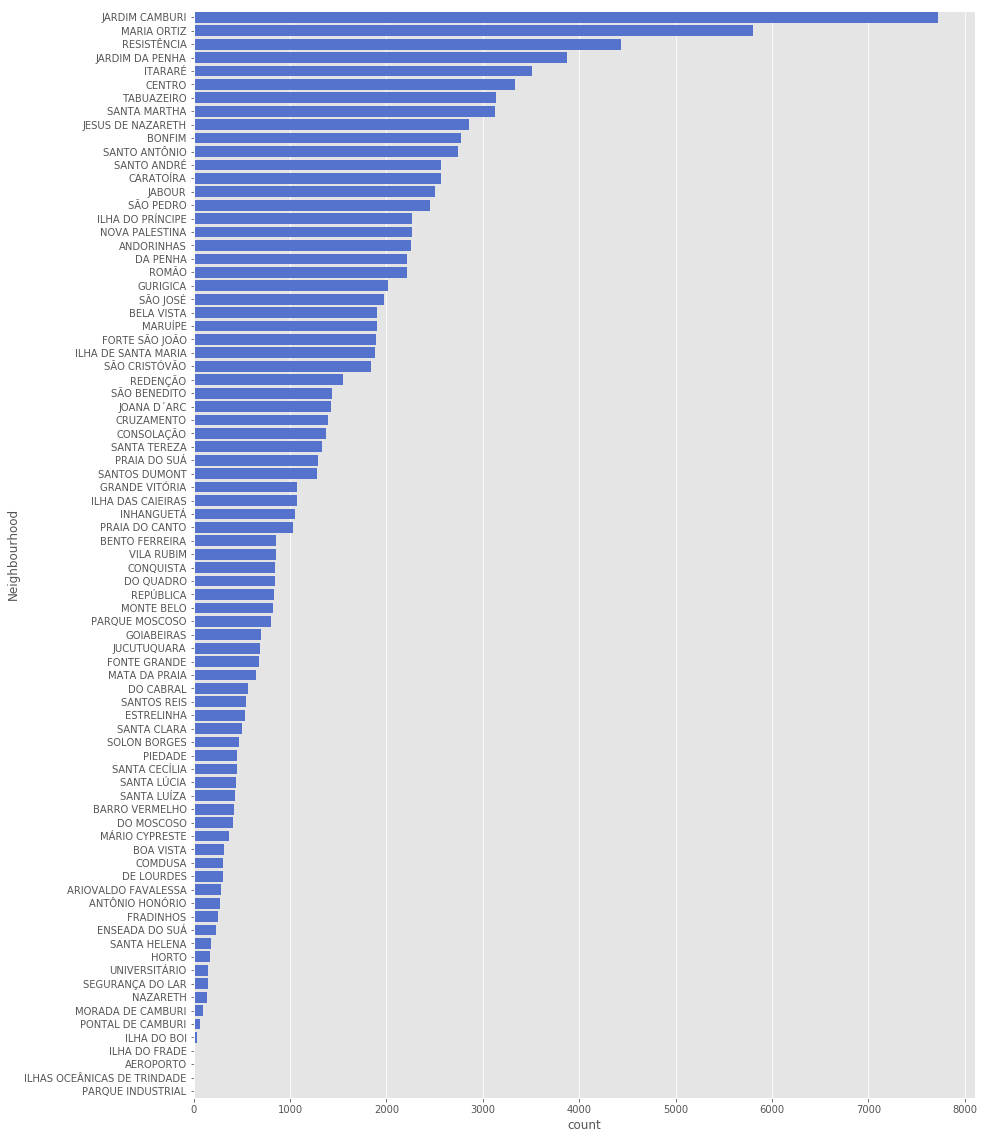

In [65]:
plt.figure(figsize = (14, 20))
sns.countplot(y = "Neighbourhood", data = df, order = df["Neighbourhood"].value_counts().index, color="royalblue")

In [66]:
type(df["ScheduledDay"][0])

str

In [67]:
df["ScheduledDay"]

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
5         2016-04-27T08:36:51Z
6         2016-04-27T15:05:12Z
7         2016-04-27T15:39:58Z
8         2016-04-29T08:02:16Z
9         2016-04-27T12:48:25Z
10        2016-04-27T14:58:11Z
11        2016-04-26T08:44:12Z
12        2016-04-28T11:33:51Z
13        2016-04-28T14:52:07Z
14        2016-04-28T10:06:24Z
15        2016-04-26T08:47:27Z
16        2016-04-28T08:51:47Z
17        2016-04-28T09:28:57Z
18        2016-04-26T10:54:18Z
19        2016-04-29T10:43:14Z
20        2016-04-27T07:51:14Z
21        2016-04-27T10:50:45Z
22        2016-04-25T13:29:16Z
23        2016-04-28T10:27:05Z
24        2016-04-29T14:19:19Z
25        2016-04-26T15:04:17Z
26        2016-04-29T14:19:42Z
27        2016-04-27T10:51:45Z
28        2016-04-29T15:48:02Z
29        2016-04-29T15:16:29Z
                  ...         
110497    2016-06-01T09:46:33Z
110498  

In [68]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [69]:
teste = df["ScheduledDay"][0]

In [70]:
teste

'2016-04-29T18:38:08Z'

In [71]:
import datetime

In [72]:
teste.split("T")

['2016-04-29', '18:38:08Z']

In [73]:
teste.split("T")[0][-2:]

'29'

In [74]:
def get_day(x):
    return x.split("T")[0][-2:]

In [75]:
df["Scheduled Days of Month"] = df["ScheduledDay"].apply(get_day)

In [76]:
df["Scheduled Days of Month"].nunique()

31

In [77]:
teste.split("T")[1][:2]

'18'

In [78]:
def get_hour(x):
    return x.split("T")[1][:2]

In [79]:
df["Scheduled Hour"] = df["ScheduledDay"].apply(get_hour)

In [80]:
df["Scheduled Hour"].unique()

array(['18', '16', '17', '08', '15', '12', '14', '11', '10', '09', '07',
       '13', '19', '20', '06', '21'], dtype=object)

In [81]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Days of Month,Scheduled Hour
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,18
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,16
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,16
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,17
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,16


In [82]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Days of Month,Scheduled Hour
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,18
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,16
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,16
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,17
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,16


In [83]:
df["Gender"] = df["Gender"].apply(one_hot_gender)

In [84]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Days of Month,Scheduled Hour
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,18
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,16
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,16
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,17
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,16


In [85]:
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,62,39,0,1,0,0,0,0
1,1,56,39,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0


In [86]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Days of Month,Scheduled Hour
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,18
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,16
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,16
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,17
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,16


In [87]:
X["Appointment Days of Month"] = df["AppointmentDay"].apply(get_day)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment Days of Month
0,0,62,39,0,1,0,0,0,0,29
1,1,56,39,0,0,0,0,0,0,29
2,0,62,45,0,0,0,0,0,0,29
3,0,8,54,0,0,0,0,0,0,29
4,0,56,39,0,1,1,0,0,0,29


In [89]:
X["Appointment Hour"] = df["AppointmentDay"].apply(get_hour)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
X["Scheduled Hour"] = df["Scheduled Hour"]

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
X["Scheduled Days of Month"] = df["Scheduled Days of Month"]

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment Days of Month,Appointment Hour,Scheduled Hour,Scheduled Days of Month
0,0,62,39,0,1,0,0,0,0,29,00,18,29
1,1,56,39,0,0,0,0,0,0,29,00,16,29
2,0,62,45,0,0,0,0,0,0,29,00,16,29
3,0,8,54,0,0,0,0,0,0,29,00,17,29
4,0,56,39,0,1,1,0,0,0,29,00,16,29


In [93]:
normalizer

Normalizer(copy=True, norm='l2')

In [94]:
y

,No-show
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [96]:
X_train = normalizer.fit_transform(X_train)

In [97]:
X_test = normalizer.transform(X_test)

In [98]:
model.fit(X_train, y_train)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
preds = model.predict(X_test)

In [100]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17608
          1       0.00      0.00      0.00      4497

avg / total       0.63      0.80      0.71     22105



In [101]:
X_train

array([[0.        , 0.59768358, 0.79227823, ..., 0.        , 0.08339771,
        0.02779924],
       [0.        , 0.15663874, 0.88761955, ..., 0.        , 0.1827452 ,
        0.3654904 ],
       [0.        , 0.31840804, 0.88699383, ..., 0.        , 0.09097373,
        0.22743431],
       ...,
       [0.        , 0.63197206, 0.76739465, ..., 0.        , 0.10156694,
        0.02257043],
       [0.        , 0.97350282, 0.15452426, ..., 0.        , 0.12361941,
        0.03090485],
       [0.0212766 , 0.0212766 , 0.9787234 , ..., 0.        , 0.19148936,
        0.0212766 ]])

In [102]:
from sklearn.neural_network import MLPClassifier

In [103]:
model = MLPClassifier(hidden_layer_sizes= (50), activation = "relu", solver = "adam", learning_rate= "constant")

In [104]:
model.fit(X_train, y_train)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [105]:
preds = model.predict(X_test)

In [106]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17608
          1       0.35      0.00      0.00      4497

avg / total       0.71      0.80      0.71     22105



In [107]:
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment Days of Month,Appointment Hour,Scheduled Hour,Scheduled Days of Month
0,0,62,39,0,1,0,0,0,0,29,00,18,29
1,1,56,39,0,0,0,0,0,0,29,00,16,29
2,0,62,45,0,0,0,0,0,0,29,00,16,29
3,0,8,54,0,0,0,0,0,0,29,00,17,29
4,0,56,39,0,1,1,0,0,0,29,00,16,29


In [108]:
X.drop(["Appointment Days of Month", "Appointment Hour", "Scheduled Hour", "Scheduled Days of Month"], axis = 1, inplace = True)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [109]:
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,62,39,0,1,0,0,0,0
1,1,56,39,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [111]:
X_train = normalizer.fit_transform(X_train)

In [112]:
X_test = normalizer.transform(X_test)

In [113]:
model.fit(X_train, y_train)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [114]:
preds = model.predict(X_test)

In [115]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17691
          1       0.00      0.00      0.00      4414

avg / total       0.64      0.80      0.71     22105



c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
model = MLPClassifier(hidden_layer_sizes=(100,), activation="relu", solver = "adam")

In [117]:
model.fit(X_train, y_train)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [118]:
preds = model.predict(X_test)

In [119]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17691
          1       0.00      0.00      0.00      4414

avg / total       0.64      0.80      0.71     22105



In [120]:
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,62,39,0,1,0,0,0,0
1,1,56,39,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0


In [121]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Days of Month,Scheduled Hour
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,18
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,16
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,16
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,17
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,16


In [122]:
df["Appointment Days od Month"] = df["AppointmentDay"].apply(get_day)

In [123]:
df["Appointment Hour"] = df["AppointmentDay"].apply(get_hour)

In [124]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Days of Month,Scheduled Hour,Appointment Days od Month,Appointment Hour
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,18,29,00
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,16,29,00
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,16,29,00
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,17,29,00
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,16,29,00


In [125]:
X["App Day"] = df["Appointment Days od Month"]
X["App Hour"] = df["Appointment Hour"]
X["Sch Day"] = df["Scheduled Days of Month"]
X["Sch Hour"] = df["Scheduled Hour"]


c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [126]:
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,App Day,App Hour,Sch Day,Sch Hour
0,0,62,39,0,1,0,0,0,0,29,00,29,18
1,1,56,39,0,0,0,0,0,0,29,00,29,16
2,0,62,45,0,0,0,0,0,0,29,00,29,16
3,0,8,54,0,0,0,0,0,0,29,00,29,17
4,0,56,39,0,1,1,0,0,0,29,00,29,16


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [128]:
X_train = normalizer.fit_transform(X_train)

In [129]:
X_test = normalizer.transform(X_test)

In [130]:
model.fit(X_train, y_train)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [131]:
preds = model.predict(X_test)

In [132]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17587
          1       0.46      0.00      0.01      4518

avg / total       0.73      0.80      0.71     22105



In [133]:
model = MLPClassifier(hidden_layer_sizes=(100, 100), 
                      activation="relu", 
                      solver = "adam", 
                      learning_rate_init=.0001, 
                      learning_rate= "constant")

In [134]:
model.fit(X_train, y_train)

c:\users\vitor\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [135]:
preds = model.predict(X_test)

In [136]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     17587
          1       0.21      0.00      0.00      4518

avg / total       0.68      0.80      0.71     22105

